### Outliers and Impact on Machine Learning

### Which machine learning models are sensitive to outliers ?

1. Naive Bayes ------ Not Sensitive to outliers
2. SVM ------- Not Sensitive to outliers
3. Linear Regression -------- Sensitive to outliers
4. Logistic Regression ------- Sensitive to outliers
5. Decision Tree -------- Not Sensitive to outliers
6. Ensemble(RF,XG,Ada,GB) -------- Not Sensitive to outliers
7. KNN --------- Not Sensitive
8. Kmeans -------- Sensitive
9. Hierarchical --------- Sensitive
10. PCA,LDA -------- Sensitive
11. DBScan --------- Sensitive
12. Neural Network -------- Sensitive

Unsupervised ML algorithms are mostly sensitive to outliers

#### Remember

- Avoid to Use not sensitive algorithms

- Dont directly select the neural network if the dataset is imbalanced and outliers.Use each and every algorithm which are not sensitive to outliers.

- If the dataset is good use selected algorithm which are sensitive or not sensitive.

- If have huge amount of data and records use sensitive related algorithm.

In [143]:
# Import the dataset

import pandas as pd
df = pd.read_csv('D:\\Feature Engineering\\Datasets\\Titanic Datasets\\train.csv')

In [144]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
df.Age.isnull().sum()

177

### Note and Remember:
- When you plot a boxplot or any other kind of plot using libraries like seaborn or matplotlib, NaN values in your data will generally be ignored by default. 

- The describe() method in pandas, when applied to a Series like df['Age'], calculates summary statistics for the non-null values in the Series. This means that it will not include NaN values in calculations such as the mean (average).

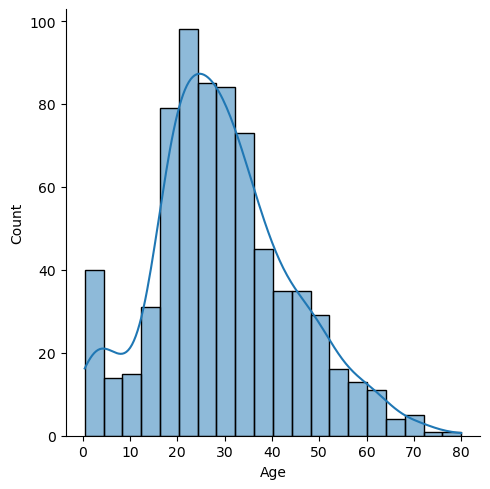

In [146]:
# Visualize the age using displot

import seaborn as sns
sns.displot(df['Age'].dropna(),kde=True)

After removing Nan value in age using dropna().It looks like an normal distribution.

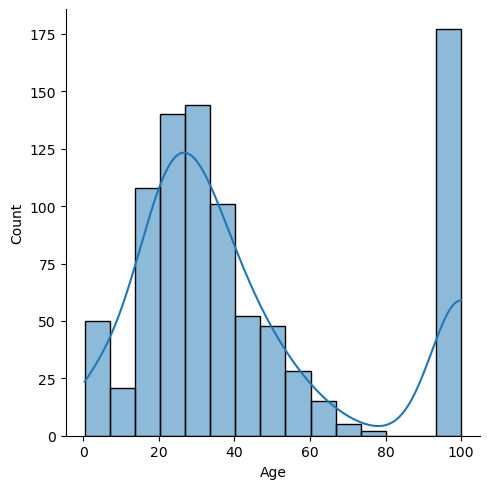

In [147]:
sns.displot(df['Age'].fillna(100),kde=True) # Create the outliers

Text(0, 0.5, 'No of Passenger')

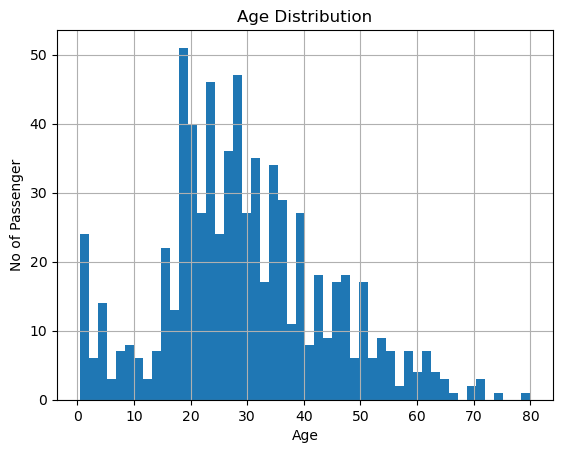

In [148]:
figure = df.Age.dropna().hist(bins=50)
figure.set_title('Age Distribution')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

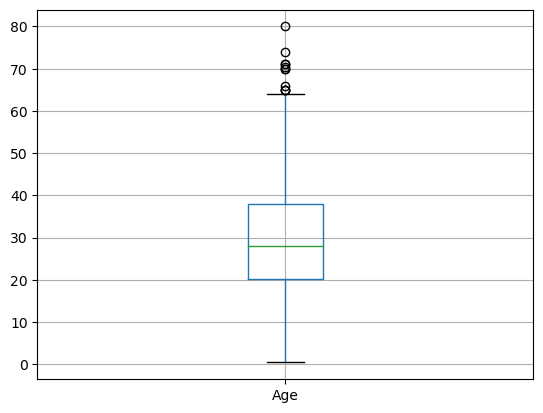

In [149]:
figure = df.boxplot(column = 'Age')

In [150]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Finding outliers using three standard deviation

In [151]:
# Assuming Age follows the normal distribution we will ccalculate the boundaries which differentiates the outliers

upper_boundary = df['Age'].mean() + 3*df['Age'].std()  # Upperbound means the gaussian curve after 3 standard deviation right
lower_boundary = df['Age'].mean() - 3*df['Age'].std()  # Lowerbound means the gaussian curve after 3 standard deviation left
mean = df['Age'].mean()

In [152]:
lower_boundary,mean,upper_boundary

(-13.88037434994331, 29.69911764705882, 73.27860964406095)

- This is the one way to find outliers using after and before three std.
- Then apply if conditions to reject the outliers.

### Finding outliers using Boxplot Concept (Five Number Summary)

In [153]:
# using boxplot concepts

# Calculate IQR 
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

lower_fence = df['Age'].quantile(0.25) - (IQR*1.5)
upper_fence = df['Age'].quantile(0.75) + (IQR*1.5)

In [154]:
lower_fence,upper_fence

(-6.6875, 64.8125)

In [155]:
# Extreme Outliers
lower_fence = df['Age'].quantile(0.25) - (IQR*3)
upper_fence = df['Age'].quantile(0.75) + (IQR*3)

lower_fence,upper_fence

(-33.5, 91.625)

These are the methods to detect anamolies and outliers for the normal distributed data.It does not work well for skewed data.

The values 1.5 and 3.0 are commonly used multipliers when working with the Interquartile Range (IQR) to identify potential outliers. These multipliers are part of a rule called the "1.5 IQR rule" or the "3.0 IQR rule" for identifying outliers in a dataset.

Here's why these specific multipliers are used:

#### 1.5 IQR Rule
        When you use a multiplier of 1.5 with the IQR, you are creating relatively narrow bounds for what is considered
        an outlier.
        
        Data points that are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered potential outliers.
        This rule is less strict and may capture mild outliers.

#### 3.0 IQR Rule
        When you use a multiplier of 3.0 with the IQR, you are creating wider bounds for identifying outliers.
        Data points that are below Q1 - 3.0 * IQR or above Q3 + 3.0 * IQR are considered potential outliers.
        This rule is more strict and captures only extreme outliers.

The choice between 1.5 and 3.0 depends on the context and the data you are working with. Using 1.5 is more commonly used and captures a broader range of potential outliers. Using 3.0 is more conservative and captures only the most extreme outliers. The choice should be based on the specific requirements of your analysis and the characteristics of your data.

### How to find outliers if the data is not follows the gaussian distribution

#### If the data is skewed do following things,

Text(0, 0.5, 'No of passengers')

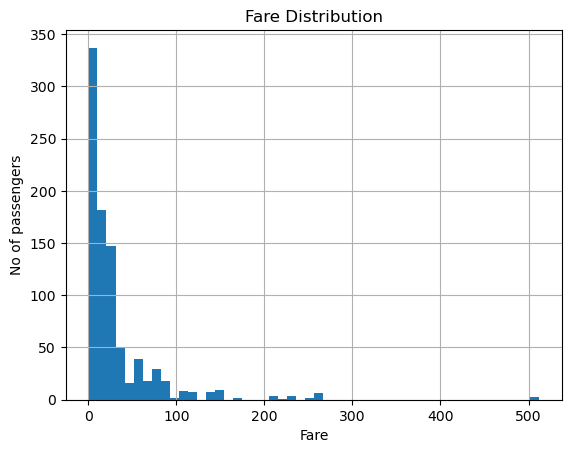

In [156]:
# Suppose i plot the Fare feature
figure = df['Fare'].hist(bins=50)
figure.set_title('Fare Distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

 See the data is right skewed

<Axes: >

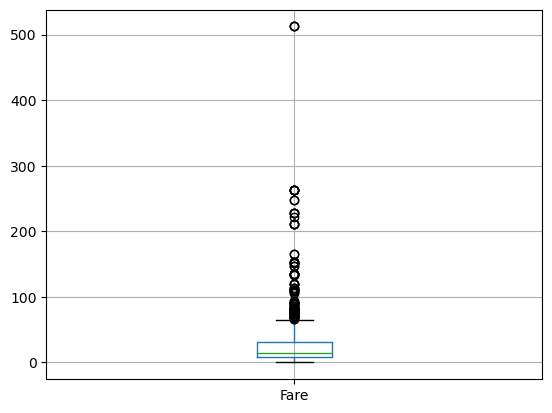

In [157]:
df.boxplot(column = 'Fare')

In [158]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [159]:
## lets compute the interquartile range to calculate the boundaries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [160]:
# this is right skewed data inorder to avoid that outliers use extreme outliers
# Extreme Outliers
lower_fence = df['Fare'].quantile(0.25) - (IQR*3)
upper_fence = df['Fare'].quantile(0.75) + (IQR*3)

lower_fence,upper_fence

(-61.358399999999996, 100.2688)

##### Remember the right and left skewed data using Extreme outliers
##### Normal distribution data using standard outliers technique

In [161]:
# Replace the outliers to normal data

data = df.copy()

data.loc[data['Age'] >= 73, 'Age'] = 73
data.loc[data['Fare'] >= 100, 'Fare'] = 100

In [162]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of passengers')

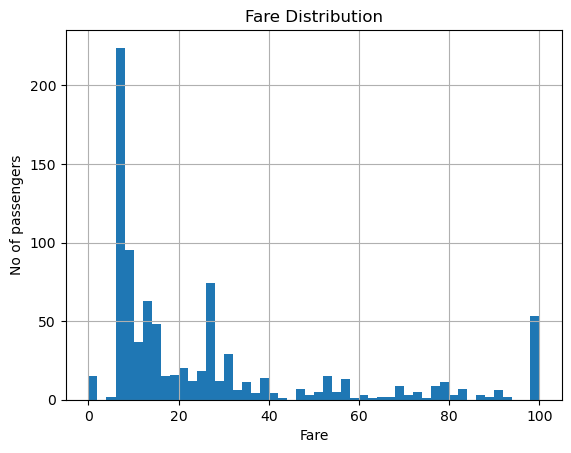

In [163]:
# Suppose i plot the Fare feature
figure = data['Fare'].hist(bins=50)
figure.set_title('Fare Distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

 See the most of outliers are converted into 100.

Text(0, 0.5, 'No of passengers')

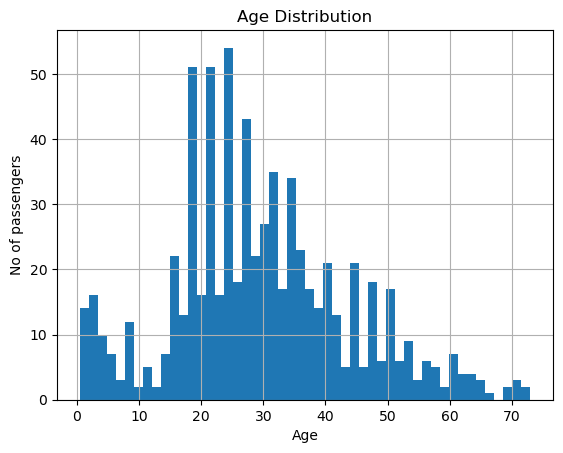

In [164]:
# Suppose i plot the Age feature
figure = data['Age'].hist(bins=50)
figure.set_title('Age Distribution')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

See the age is limited with 73 others are removed with the help of above condition

In [171]:
# Lets build some machine learning model from data not df(because in data we removed outliers)

# train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size = 0.20) # passing independent and not independent feature


In [172]:
## Using Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test) # why probability is calculate because of this is parameter of ROC AOC Score

from sklearn.metrics import accuracy_score,roc_auc_score
print("Acuracy_score:{}".format(accuracy_score(y_test,y_pred)))
print("Roc_Auc_score:{}".format(roc_auc_score(y_test,y_pred1[:,1])))

Acuracy_score:0.6927374301675978
Roc_Auc_score:0.6986490212296664


In [173]:
## Using Random Forest Regression
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Acuracy_score:{}".format(accuracy_score(y_test,y_pred)))
print("Roc_Auc_score:{}".format(roc_auc_score(y_test,y_pred1[:,1])))


Acuracy_score:0.7094972067039106
Roc_Auc_score:0.7568238213399504


### ROC AUC Score
   The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a measure that tells you how well a binary classification model can distinguish between two classes, typically a positive class and a negative class. It quantifies the model's ability to correctly classify examples from both classes while varying the classification threshold.

#### How it works:

Imagine you have a model that predicts whether an email is spam (positive class) or not spam (negative class). The ROC AUC score evaluates how well your model can differentiate between spam and non-spam emails across different threshold values. It looks at the trade-off between correctly identifying spam emails (True Positives) and incorrectly classifying non-spam emails as spam (False Positives).

#### When to use it:

You should consider using ROC AUC when:

   Binary Classification: You are working on a binary classification problem where you want to assess the performance of a model that classifies data into two categories (e.g., spam or not spam, disease-positive or disease-negative).

   Model Comparison: You want to compare the performance of different models to see which one does a better job of distinguishing between the two classes. ROC AUC is useful for model selection.

   Imbalanced Classes: Your dataset has imbalanced class distribution, meaning one class significantly outnumbers the other. ROC AUC provides a reliable performance measure in such cases.

   Threshold Independence: You don't want to specify a fixed classification threshold. ROC AUC considers all possible thresholds, making it suitable for situations where you're not sure which threshold is best.